In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [8]:
# 下載cifat10資料集, 包含60,000張10個不同分類的32*32的彩色照片
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
# 命名10個class
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
# 作一個Sequentail Model
model = models.Sequential()

# 加入Conv2D層
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32, 32, 3))) 
# 32為Filter數量, (3,3)為Filter長寬, (32, 32, 3)為image_height, image_width, image_channels
# 加入MaxPooling層
model.add(layers.MaxPooling2D(2, 2))
# 加入Conv2D層
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# 加入MaxPooling層
model.add(layers.MaxPooling2D(2, 2))
# 加入Conv2D層
model.add(layers.Conv2D(64, (3,3) , activation = 'relu'))

model.summary()
# Param 為神經網路的權重
# 公式: Filter height * Filter width * input channels * Number of Filter + Number of Filter

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [19]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8472 - accuracy: 0.7084 - val_loss: 1.1100 - val_accuracy: 0.6433
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7057 - accuracy: 0.7562 - val_loss: 1.1454 - val_accuracy: 0.6480
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6547 - accuracy: 0.7749 - val_loss: 1.0731 - val_accuracy: 0.6655
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6206 - accuracy: 0.7854 - val_loss: 1.1271 - val_accuracy: 0.6552
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5746 - accuracy: 0.8009 - val_loss: 1.1416 - val_accuracy: 0.6570
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5435 - accuracy: 0.8104 - val_loss: 1.1486 - val_accuracy: 0.6582
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5056 - accuracy: 0.8248 - val_loss: 1.1814 - val_ac

313/313 - 1s - loss: 1.1247 - accuracy: 0.6527
0.6527000069618225



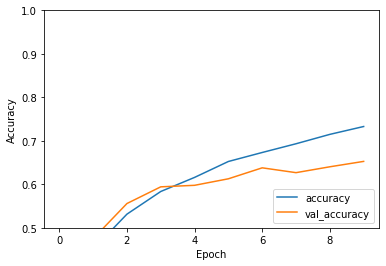

In [16]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print(test_acc)
print()
plt.show()